<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/03_Regresi%C3%B3n_Lineal/AnalisisDiscriminante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del Discriminante

# Data

Se trata de un dataset con información de enfermedad del corazón.


https://www.kaggle.com/datasets/ambujdevsingh/key-indicators-of-heart-disease

In [1]:
import pandas as pd
import numpy as np
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download ambujdevsingh/key-indicators-of-heart-disease


import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

Mounted at /content/drive
  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 185MB/s]


In [2]:
df=pd.read_csv('/content/heart_2022_Key_indicators.csv')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Análisis del Discriminante Lineal (LDA)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

vars=['SleepTime']
X=df[vars]
y=df['HeartDisease']

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)

In [24]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [25]:
lda.score(X,y)

0.9144045404086993

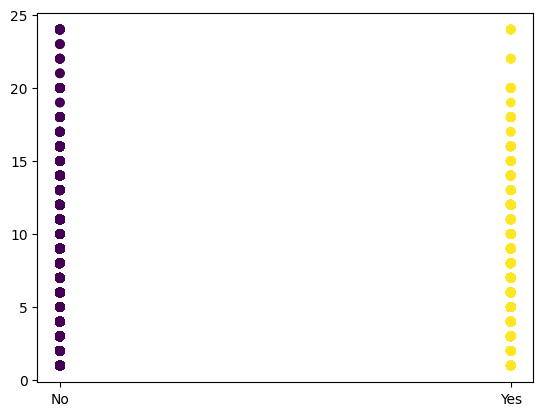

In [27]:
from matplotlib import pyplot as plt
plt.scatter(y, X['SleepTime'], c=pd.get_dummies(y)['Yes']*255)
plt.show()

In [21]:
val=np.array([120]).reshape(1, -1)
lda.predict(val)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['Yes'], dtype='<U3')

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print('True Negatives: ', confusion_matrix[0][0])
print('False Positives: ', confusion_matrix[0][1])
print('False Negatives: ', confusion_matrix[1][0])
print('True Positives: ', confusion_matrix[1][1])

True Negatives:  292422
False Positives:  0
False Negatives:  27373
True Positives:  0


# Análisis de Discriminante Cuadrático (QDA)

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)

In [29]:
qda.score(X,y)

0.9109835988680248

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print('True Negatives: ', confusion_matrix[0][0])
print('False Positives: ', confusion_matrix[0][1])
print('False Negatives: ', confusion_matrix[1][0])
print('True Positives: ', confusion_matrix[1][1])

True Negatives:  291100
False Positives:  1322
False Negatives:  27145
True Positives:  228


# Resto de las variables

In [31]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].map({'Yes': 1, 'No': 0})
df = pd.concat([df, pd.get_dummies(df['DiffWalking'], prefix='DifficultyWalking')], axis=1)
df['Sex'] = df['Sex'].map({'Male': 1, 'Female':0})
df = pd.concat([df, pd.get_dummies(df['AgeCategory'], prefix='AgeCategory')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Race'], prefix='Race')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Diabetic'], prefix='Diabetic')], axis=1)
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})
df = pd.concat([df, pd.get_dummies(df['GenHealth'], prefix='GenHealth')], axis=1)
df['Asthma'] = df['Asthma'].map({'Yes': 1, 'No': 0})
df['KidneyDisease'] = df['KidneyDisease'].map({'Yes': 1, 'No': 0})
df['SkinCancer'] = df['SkinCancer'].map({'Yes': 1, 'No': 0})
df = df.drop(['DiffWalking'], axis=1)
df = df.drop(['AgeCategory'], axis=1)
df = df.drop(['Race'], axis=1)
df = df.drop(['GenHealth'], axis=1)
df = df.drop(['Diabetic'], axis=1)

In [32]:
vars=list(df.columns)
vars.remove('HeartDisease')

In [33]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
X=df[vars]
y_pred = lda.fit(X, y).predict(X)

In [34]:
lda.score(X,y)

0.9078440876186307

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print('True Negatives: ', confusion_matrix[0][0])
print('False Positives: ', confusion_matrix[0][1])
print('False Negatives: ', confusion_matrix[1][0])
print('True Positives: ', confusion_matrix[1][1])

True Negatives:  283442
False Positives:  8980
False Negatives:  20491
True Positives:  6882


In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print('True Negatives: ', confusion_matrix[0][0])
print('False Positives: ', confusion_matrix[0][1])
print('False Negatives: ', confusion_matrix[1][0])
print('True Positives: ', confusion_matrix[1][1])

True Negatives:  219497
False Positives:  72925
False Negatives:  7255
True Positives:  20118
